In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.NCO import NCO

1637.0
-1637.0


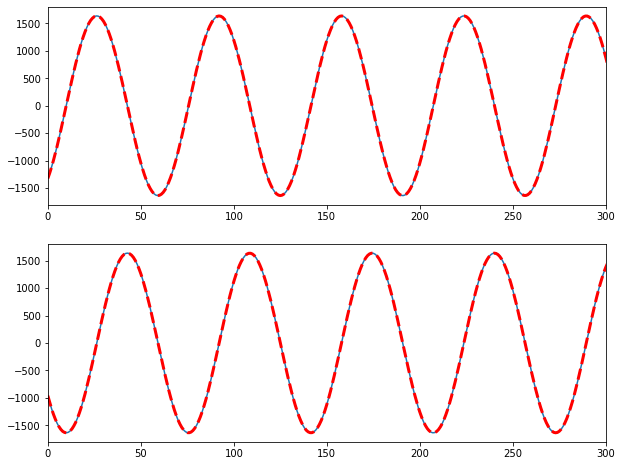

In [2]:
f0 = 152
fs = 10000
ampl = 1.6
phi0 = 0.6
impl = ('int', (32, 10, 12))
nco1 = NCO(f0, fs, ampl=ampl, phi0=phi0, impl=('float', None))
nco2 = NCO(f0, fs, ampl=ampl, phi0=phi0, impl=impl)
vals1 = np.array([nco1.update(0) for _ in range(1000)])
vals2 = np.array([nco2.update(0) for _ in range(1000)])

plt.subplots(2, 1, figsize=(10, 8))
plt.subplot(211)
plt.plot(2047 * 1/np.ceil(ampl) * vals1.real);
plt.plot(vals2.real, 'r--', linewidth=3);
plt.xlim(0, 300);
plt.subplot(212)
plt.plot(2047 * 1/np.ceil(ampl) * vals1.imag);
plt.plot(vals2.imag, 'r--', linewidth=3);
plt.xlim(0, 300);
print(np.max(vals2.real))
print(np.min(vals2.imag))

In [3]:
isPhi0 = True
isOdv = True
nco2.convert(isPhi0, isOdv)

with open('./vhdl/NCO.vhd') as f:
    print(f.read())

-- File: ./vhdl/NCO.vhd
-- Generated by MyHDL 0.11
-- Date: Sun Jun 16 18:33:49 2019


library IEEE;
use IEEE.std_logic_1164.all;
use IEEE.numeric_std.all;
use std.textio.all;

use work.pck_myhdl_011.all;

entity NCO is
    port (
        i_clk: in std_logic;
        i_rst: in std_logic;
        i_fw: in unsigned(31 downto 0);
        i_ph0: in unsigned(31 downto 0);
        i_ce: in std_logic;
        o_cos: out signed (11 downto 0);
        o_sin: out signed (11 downto 0);
        o_dv: out std_logic
    );
end entity NCO;
-- rtl-model of NCO
-- ~~~~ input ports ~~~~
-- - i_clk - clock;
-- - i_rst - synchronous reset;
-- - i_fw - frequency word;
-- - i_ph0 - initial phase (after reset), can be set to None;
-- - i_ce - clock enable;
-- ~~~~ output ports ~~~~
-- - o_cos - cosine output;
-- - o_sin - sine output;
-- - o_dv - output valid, can be set None;
-- ~~~~ parameters ~~~~
-- tblDepth - Depth of ROM with sine/cosine samples

architecture MyHDL of NCO is



signal acc: unsigned(31 

In [4]:
tb = nco2.test_rtl()
tb.config_sim(trace=False)
tb.run_sim()

print(len(nco2.rtlRefs))
print(len(nco2.rtlOuts))
print(nco2.rtlRefs[:20])
print(nco2.rtlOuts[:20])

 **** Test passed **** 
2000
2000
[-1325. -961.j -1228.-1082.j -1118.-1196.j  -999.-1297.j  -871.-1386.j
  -736.-1462.j  -591.-1526.j  -444.-1575.j  -292.-1611.j  -138.-1631.j
    20.-1637.j   175.-1627.j   329.-1603.j   480.-1565.j   629.-1511.j
   769.-1445.j   903.-1365.j  1031.-1272.j  1147.-1168.j  1252.-1054.j]
[ 1637.   +0.j  1637.   +0.j -1325. -961.j -1228.-1082.j -1118.-1196.j
  -999.-1297.j  -871.-1386.j  -736.-1462.j  -591.-1526.j  -444.-1575.j
  -292.-1611.j  -138.-1631.j    20.-1637.j   175.-1627.j   329.-1603.j
   480.-1565.j   629.-1511.j   769.-1445.j   903.-1365.j  1031.-1272.j]


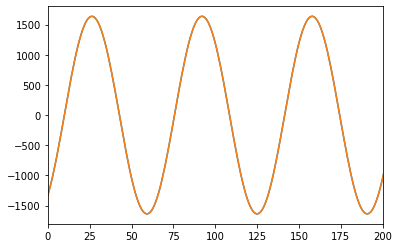

In [5]:
plt.plot(nco2.rtlOuts.real[2:]);
plt.plot(nco2.rtlRefs.real);
plt.xlim(0, 200);